#### Import Pandas, Numpy, Seaborn, Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the csv

In [2]:
df=pd.read_csv('Data/heart failure.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Check for null values

In [4]:
df.isna().sum().sum()

0

#### Check categorical variable

In [5]:
categorical_var=[feature for feature in df.select_dtypes(include='O')]

In [6]:
for feature in categorical_var:
    print(f' unique values for {feature} are: {df[feature].unique()}')

 unique values for Sex are: ['M' 'F']
 unique values for ChestPainType are: ['ATA' 'NAP' 'ASY' 'TA']
 unique values for RestingECG are: ['Normal' 'ST' 'LVH']
 unique values for ExerciseAngina are: ['N' 'Y']
 unique values for ST_Slope are: ['Up' 'Flat' 'Down']


#### Encoding our categorical variable

In [7]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

df['ChestPainType'] = enc.fit_transform(df['ChestPainType'])
df['RestingECG'] = enc.fit_transform(df['RestingECG'])

In [8]:
side = pd.get_dummies(df[['Sex','ExerciseAngina']],drop_first=True)

In [9]:
newdf = pd.concat([df,side],axis=1)

In [10]:
newdf.drop(['ExerciseAngina','Sex','ST_Slope'],axis=1,inplace=True)
newdf.rename(columns={'Sex_M': 'Gender','ExerciseAngina_Y':'ExerciseAngina'},inplace=True)

In [26]:
newdf.head(10)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease,Gender,ExerciseAngina
0,40,1,140,289,0,1,172,0.0,0,1,0
1,49,2,160,180,0,1,156,1.0,1,0,0
2,37,1,130,283,0,2,98,0.0,0,1,0
3,48,0,138,214,0,1,108,1.5,1,0,1
4,54,2,150,195,0,1,122,0.0,0,1,0
5,39,2,120,339,0,1,170,0.0,0,1,0
6,45,1,130,237,0,1,170,0.0,0,0,0
7,54,1,110,208,0,1,142,0.0,0,1,0
8,37,0,140,207,0,1,130,1.5,1,1,1
9,48,1,120,284,0,1,120,0.0,0,0,0


###### First split the data into X and y (independent and dependent variables)

In [12]:
X = newdf.drop('HeartDisease',axis=1)
y = newdf.HeartDisease

In [13]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN(sampling_strategy='all')
X_sm,y_sm =sm.fit_resample(X,y)

#### Check for imbalance

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


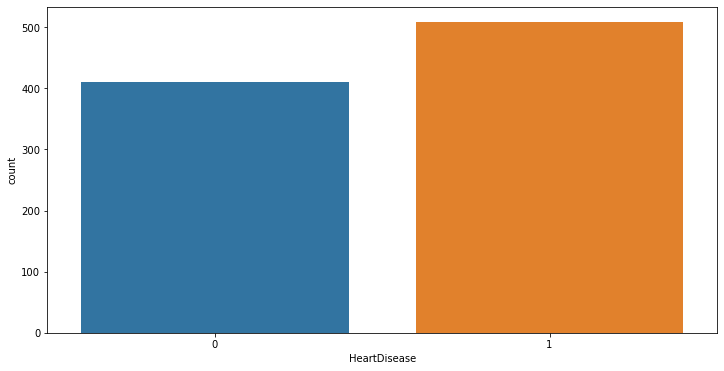

In [14]:
plt.figure(figsize=(12,6))
ax = sns.countplot(y, label="Count")

##### This will work 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=42)

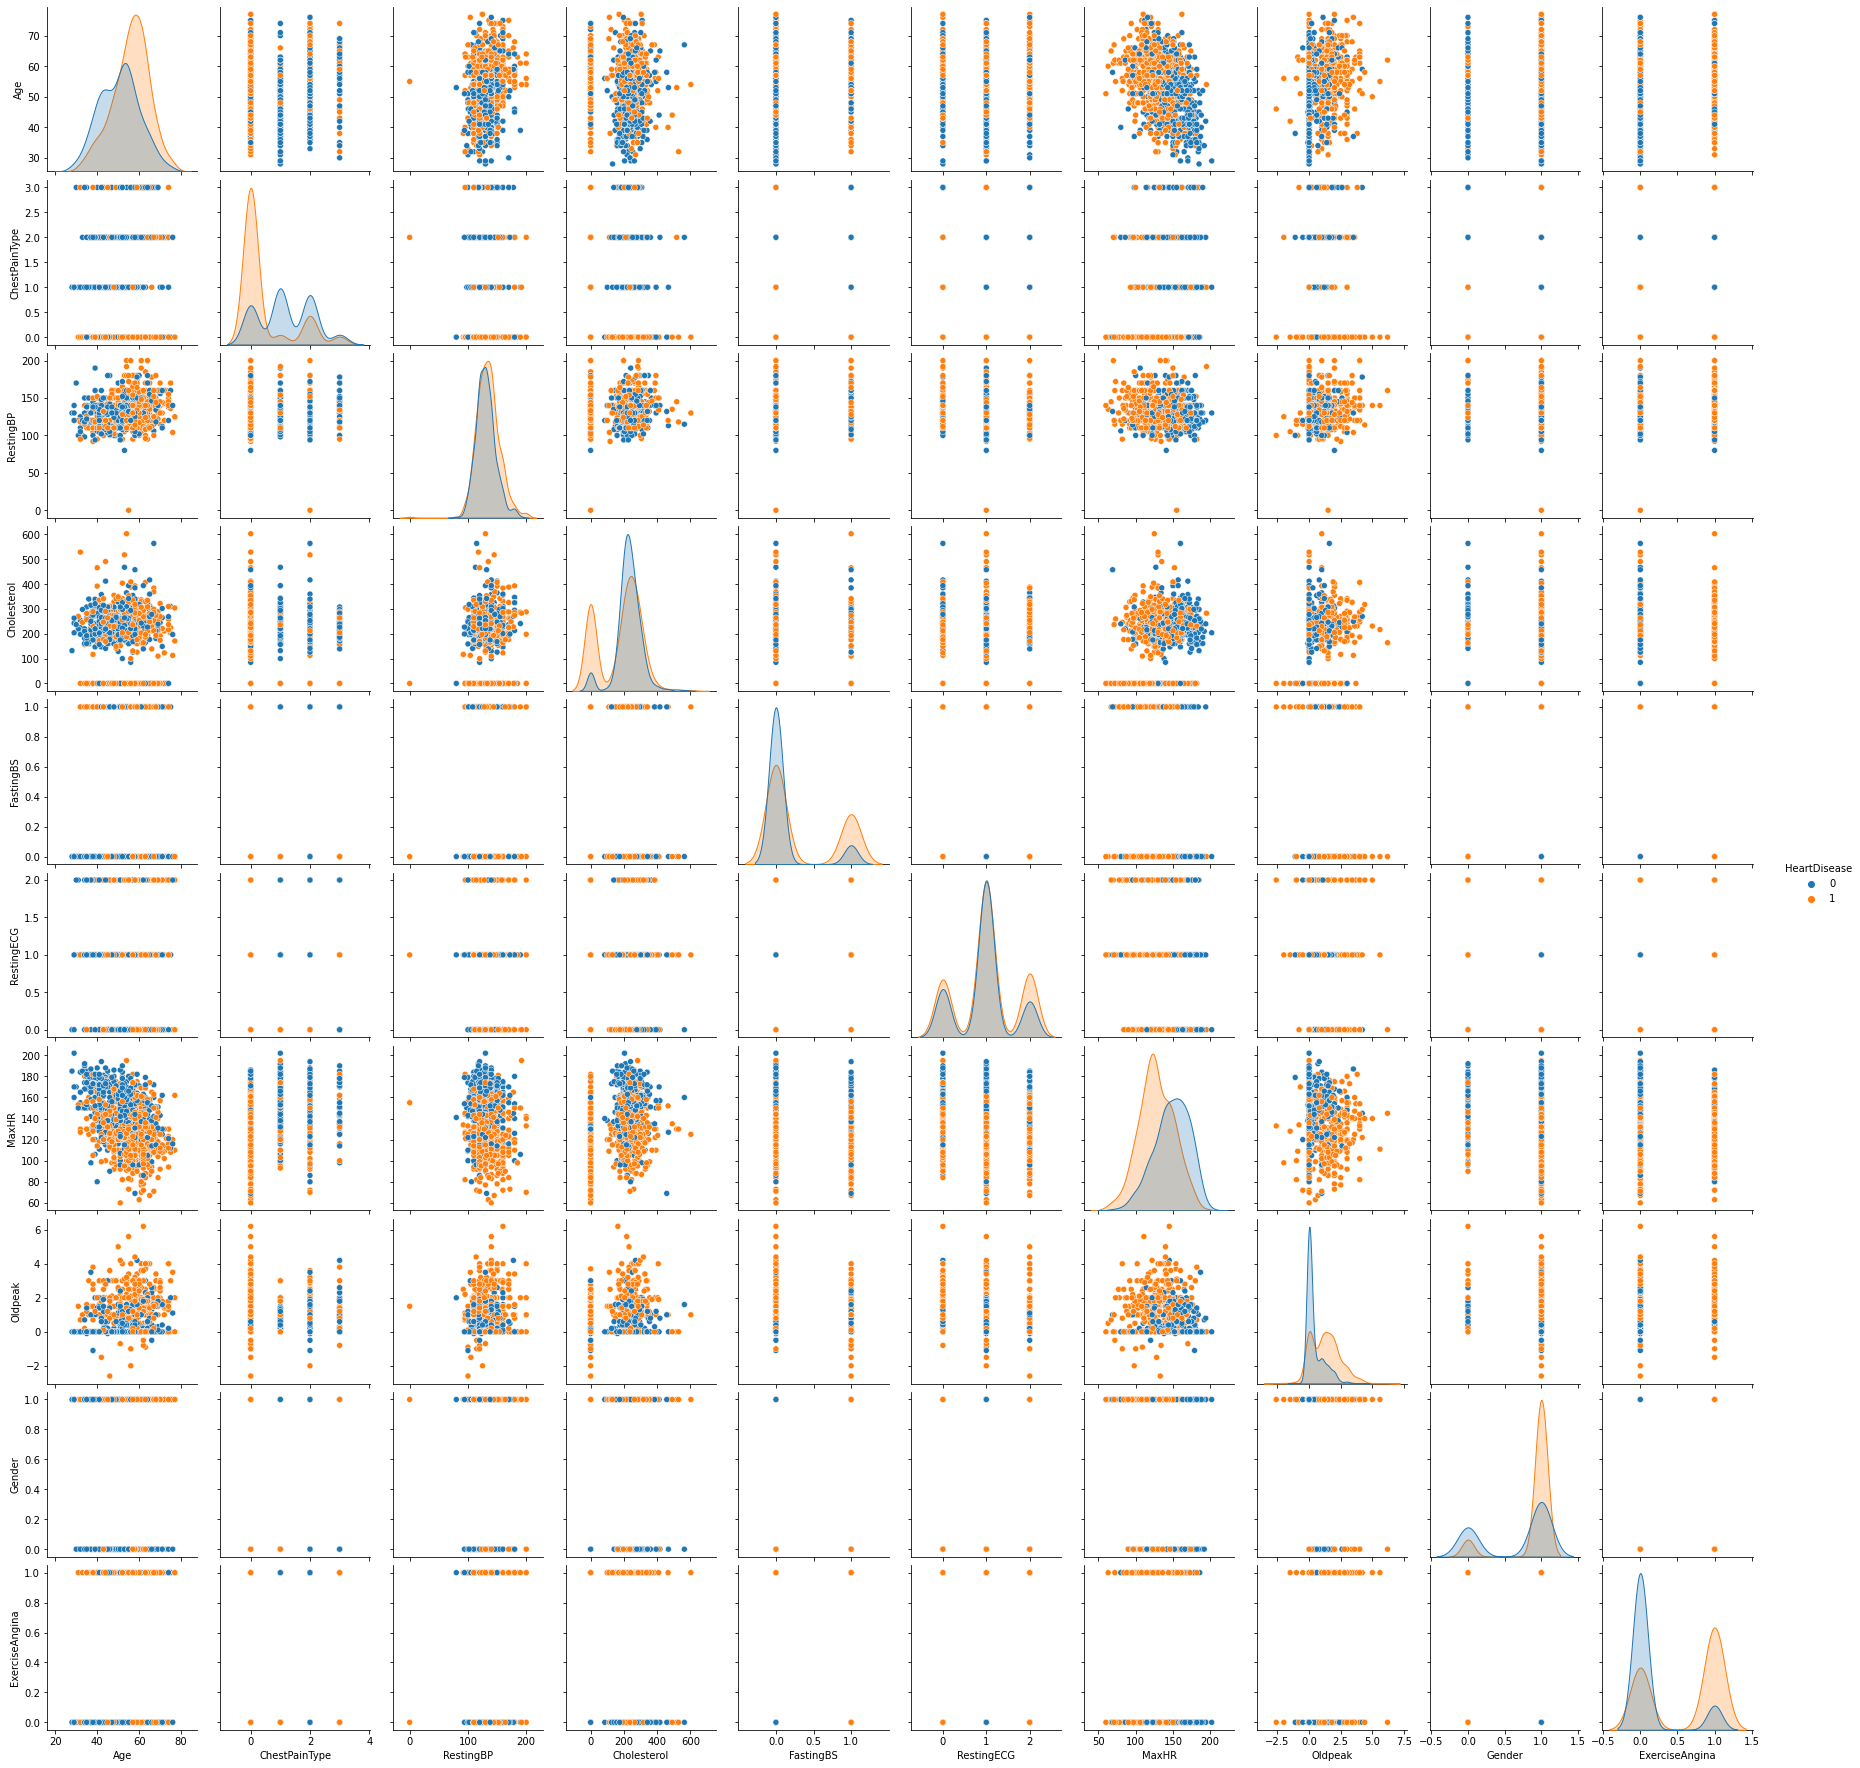

In [16]:
sns.pairplot(newdf,hue='HeartDisease')

#### Check the correlations between variables

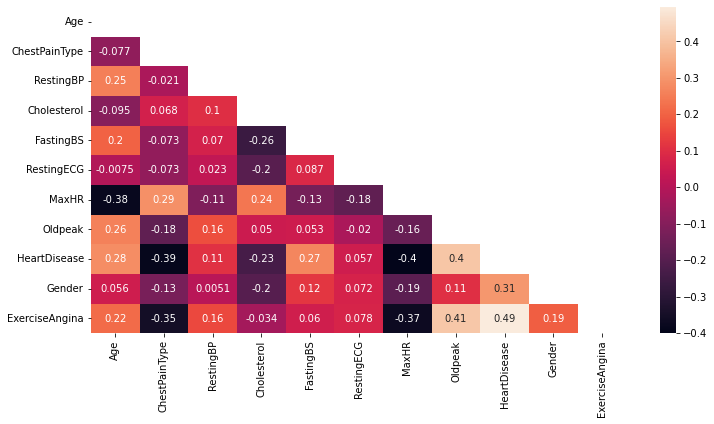

In [17]:
plt.figure(figsize=(12,6))
mask=np.triu(newdf.corr())

sns.heatmap(newdf.corr(),annot=True,mask=mask)
plt.show()

#### Model training

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
random_state = 42


model1 = DecisionTreeClassifier(random_state=random_state)
model2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=random_state))
model3 = RandomForestClassifier(n_estimators=50,random_state=random_state)
model4 = GradientBoostingClassifier(random_state=random_state)
model5 = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=10000)
model6 = XGBClassifier()
model7 = SVC(random_state=random_state)
model8 = KNeighborsClassifier()
model9 = GaussianNB()



def make_classification(X_train, X_test, y_train, y_test):
    accuracy, f1,crossvalscore = [], [],[]

    

    ##classifiers
    classifiers = []
    classifiers.append(model1)
    classifiers.append(model2)
    classifiers.append(model3)
    classifiers.append(model4)
    classifiers.append(model5)
    classifiers.append(model6)
    classifiers.append(model7)
    classifiers.append(model8)
    classifiers.append(model9)

    for classifier in classifiers:
        # classifier and fitting
        clf = classifier
        clf.fit(X_train, y_train)

        # predictions
        y_preds = clf.predict(X_test)

        # metrics
        accuracy.append(((accuracy_score(y_test, y_preds))) * 100)
        f1.append(((f1_score(y_test, y_preds))) * 100)
        crossvalscore.append(np.mean(cross_val_score(clf,X_sm,y_sm,cv=5)))
        

    results_df = pd.DataFrame({"Accuracy Score": accuracy,
                               "f1 Score": f1,
                               'Cross_val_score':crossvalscore,
                               "ML Models": ["DecisionTree", "AdaBoost",
                                             "RandomForest", "GradientBoosting",
                                             "Logistic reg",'XGB',
                                             "SVC", "KNN","GNB"]})

    results = (results_df.sort_values(by=['Cross_val_score'], ascending=False)
               .reset_index(drop=True))

    return classifiers, results


classifiers, results = make_classification(X_train, X_test, y_train, y_test)

results

,Accuracy Score,f1 Score,Cross_val_score,ML Models
0,96.825397,96.551724,0.959266,AdaBoost
1,97.619048,97.391304,0.954475,GradientBoosting
2,98.412698,98.305085,0.944836,KNN
3,95.238095,94.915254,0.940189,RandomForest
4,96.825397,96.551724,0.940189,XGB
5,93.650794,93.333333,0.918646,Logistic reg
6,92.063492,91.803279,0.911474,GNB
7,92.063492,91.666667,0.904159,DecisionTree
8,96.031746,95.652174,0.899082,SVC


#### Lets see the classification report  for the top2 models

In [23]:
y_pred8 = model8.predict(X_test)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import classification_report
print('Report for KNN:')
print(classification_report(y_test,y_pred8))
print('Report for Gradient Boosting:')
print(classification_report(y_test,y_pred4))

Report for KNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        59

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.95      0.97        59

    accuracy                           0.98       126
   macro avg       0.98      0.97      0.98       126
weighted avg       0.98      0.98      0.98       126



#### Lets test the models 

#### First Heart disease = 1 

In [24]:
data= np.array([[48,0,138,214,0,1,108,1.5,0,1]])
prediction1 = model8.predict(data)
prediction2 = model4.predict(data)
print(prediction1)
print(prediction2)

[1]
[1]


C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


#### Now heart disease = 0 ('No disease')

In [27]:
data= np.array([[54,1,110,208,0,1,142,0.0,1,0]])
prediction1 = model8.predict(data)
prediction2 = model4.predict(data)
print(prediction1)
print(prediction2)

[0]
[0]


C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [29]:
import pickle

pickle.dump(model8, open('HeartfailurKNN.pkl','wb'))        